In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Constants
ua, ub = 0, 10
k1, k2 = 10, 1
a, b, c = 0, 10, 4
h = 1.0

# Number of grid points
N = int((b - a) / h) + 1

In [3]:
# Function to calculate k(x)
def k(x):
    return k1 if a <= x < c else k2

In [4]:
# Construct the matrix A and vector f
A = np.zeros((N, N))
f = np.zeros(N)

# Boundary conditions
A[0, 0] = A[-1, -1] = 1
f[0], f[-1] = ua, ub

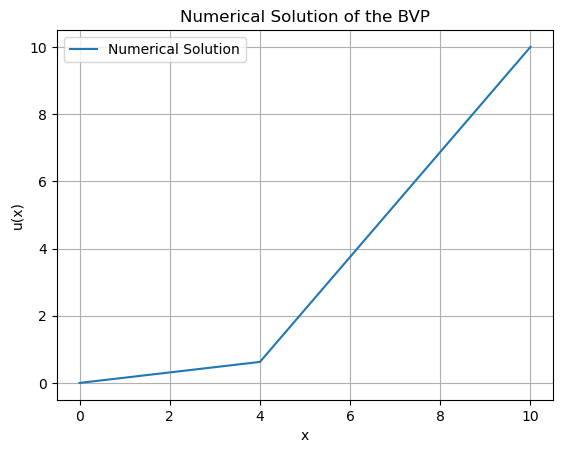

In [7]:
# Finite difference scheme
for i in range(1, N-1):
    x = a + i * h
    xw, xe = x - h, x + h
    kw, ke = k((xw+x)/2), k((xe+x)/2)
    A[i, i-1] = - kw / h**2
    A[i, i+1] = - ke / h**2
    A[i, i] = (ke + kw) / h**2

# Solve the linear system
U = np.linalg.solve(A, f)

# Plotting
plt.plot(np.linspace(a, b, N), U, label='Numerical Solution')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Numerical Solution of the BVP')
plt.legend()
plt.grid(True)
plt.show()

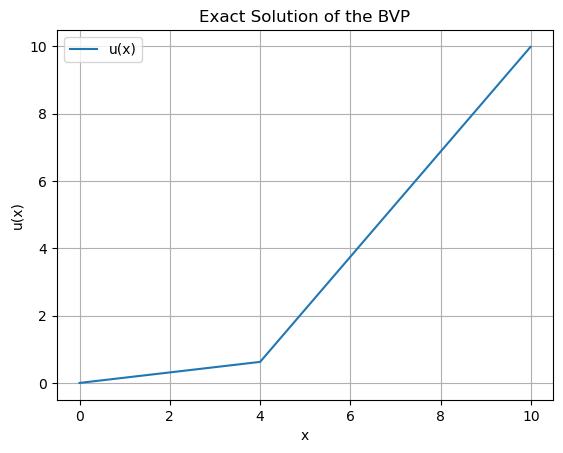

In [6]:
# Define the piecewise function
def u(x):
    if 0 <= x < 4:
        return (25 * x) / 160
    elif 4 <= x < 10:
        return (25 * x) / 16 - 90 / 16
    else:
        return None  # Return None for values outside the defined range

# Generate x values
x_values = np.linspace(0, 10, 1000)  # Range from 0 to 10

# Calculate corresponding y values
y_values = np.array([u(x) for x in x_values])

# Plot the function
plt.plot(x_values, y_values, label='u(x)')

# Add labels and title
plt.title('Exact Solution of the BVP')
plt.xlabel('x')
plt.ylabel('u(x)')

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()
